---
# Install & Load
---

In [1]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install accelerate
!pip install gluonts ujson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 15.7 MB/s eta 0:00:0

#### GluonTS

- Amazon에서 개발한 확률적 시계열 모델링을 위한 오픈 소스이며, 딥런이 기술을 사용하여 광범위한 시계열 모델을 구축, 교육 및 평가하기 위한 프레임워크 제공

- DeepAR, DeepFactor 및 WaveNet과 같은 시계열 예측을 위한 몇 가지 사전 구축된 모델과 데이터 전처리, 모델 선택 및 하이퍼파라미터 튜닝을 위한 도구가 포함

- 주요 기능 중 하나는 확률론적 예측에 중점을 둔 것으로
  - 각 시간 단계에 대한 전체 확률 분포를 출력

- CRPS(Continuous Rank Probability Score) 및 PIT(Probability Integral Transform) 히스토그램과 같은 확률적 예측의 정확도 및 보정을 평가하기 위한 도구를 제공
 

In [25]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---
# Dataset
----

In [3]:
# 1998년 1월부터 2019년 6월까지 다양한 국가 및 지역에서 호주에 도착한 월간 국제 방문자로 구성된 Tourism_Monthly 데이터 세트
dataset = load_dataset("monash_tsf", "tourism_monthly")

Generating train split:   0%|          | 0/366 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/366 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/366 [00:00<?, ? examples/s]

Dataset monash_tsf downloaded and prepared to /root/.cache/huggingface/datasets/monash_tsf/tourism_monthly/1.0.0/82998723d55d6edbc664cfaebe371004d849846ee5f61b57f1f974000d44c050. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
dataset['train']

Dataset({
    features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
    num_rows: 366
})

In [16]:
print(dataset['train'][0]['start'])
print(dataset['train'][0]['target'])

1979-01-01 00:00:00
[1149.8699951171875, 1053.8001708984375, 1388.8797607421875, 1783.3702392578125, 1921.025146484375, 2704.94482421875, 4184.41357421875, 4148.35400390625, 2620.72509765625, 1650.300048828125, 1115.9200439453125, 1370.6251220703125, 1096.31494140625, 978.4600219726562, 1294.68505859375, 1480.465087890625, 1748.865234375, 2216.920166015625, 4690.5185546875, 4682.8642578125, 2459.579833984375, 1484.4901123046875, 1028.985107421875, 1109.3648681640625, 960.8751220703125, 896.35009765625, 1118.6551513671875, 1619.9949951171875, 1847.994873046875, 2367.044921875, 4991.16015625, 4772.9443359375, 2894.678466796875, 1860.4801025390625, 1185.150146484375, 1313.659912109375, 1160.9150390625, 1061.5048828125, 1301.77001953125, 1794.3797607421875, 2106.455078125, 2789.034912109375, 4917.8466796875, 4994.4833984375, 3016.754150390625, 1941.505126953125, 1234.135009765625, 1378.72021484375, 1182.9749755859375, 1081.6600341796875, 1424.110107421875, 1774.5350341796875, 2115.42016601

In [20]:
print('train_length:',len(dataset['train'][0]['target']))
print('valid_length:',len(dataset['validation'][0]['target']))

train_length: 139
valid_length: 163


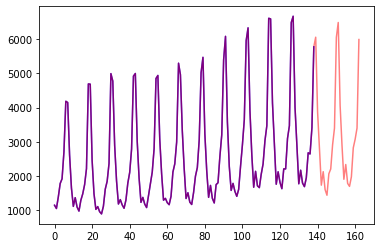

In [23]:
figure, axes = plt.subplots()
axes.plot(dataset['train'][0]['target'], color="blue")
axes.plot(dataset['validation'][0]['target'], color="red", alpha=0.5)

plt.show()

In [24]:
# 데이터셋 분할
train_dataset = dataset["train"]
test_dataset = dataset["test"]

In [32]:
# start feature의 시계열 기능을 pandas 인덱스로 변환 
from functools import lru_cache
'''lru_cache는 가장 최근에 사용한 캐시를 나타내며 함수의 결과를 메모리 하는데 사용
   동일한 입력으로 함수를 여러번 호출할 때 시간을 절약하는데 사용할 수 있음
   
   즉, 계산을 하는 함수가 있을 때, 데코레이터를 추가함으로써 각 호출 결과를 기억하고
   동일한 인수로 함수가 다시 호출되면 직접 반환하는 기능을 수행
   데코레이터 옆에 (maxsize = n)를 작성함으로써 최대 저장 개수를 설정할 수 있음'''

freq = '1M'
prediction_length = 24

@lru_cache(10000)
def convert_to_pandas_period(data, freq):
    return pd.Period(data,freq)

def transform_start_field(batch, freq):
    batch["start"] = [convert_to_pandas_period(date, freq) for date in batch["start"]]
    return batch    

In [27]:
from functools import partial
'''일부 인수를 수정하여 기존 함수에서 새 함수를 만드는데 사용하는 함수
   a,b,c를 인수로 받는 함수의 경우
   new_function = partial(my_function, b=2, c=3)
   result = new_function(a=1) 처럼 사용할 수 있음'''

train_dataset.set_transform(partial(transform_start_field, freq=freq))
test_dataset.set_transform(partial(transform_start_field, freq=freq))

In [31]:
from gluonts.time_feature import get_lags_for_frequency
'''주어진 시간 빈도(여기서는 1M)에 대한 시차 값을 계산하는 함수
   시간 주파수를 입력으로 사용하고 해당 주파수의 지연 값을 나타내는 정수 값 목록을 반환'''

from gluonts.time_feature import time_features_from_frequency_str
'''주어진 주파수 문자열(여기서는 1M)에서 시간 특성을 생성하기 위한 함수
   시간 기능은 기계학습 모델에 대한 추가 입력으로 사용되어 시계열의 시간 인덱스와 관련된 패턴을 캡처하는데 도움이 됨'''   
   
lags_sequence = get_lags_for_frequency(freq)
print(lags_sequence) # 각 시간 단계에 대해 최대 37개월을 되돌아 볼 수 있음

time_features = time_features_from_frequency_str(freq)
print(time_features) # 각 시간 단계에 대해 월을 스칼라 값으로 추가

[1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 23, 24, 25, 35, 36, 37]
[<function month_of_year at 0x7f099d16a280>]


---
# Model
---

In [33]:
# 시계열 예측을 위한 transformer 기반 모델을 생성하기 위한 도구
# 첫번째는 모델에 대한 하이퍼파라미터 및 구성 옵션을 정의
# 두번째는 모델을 생성하고 새 데이터를 예측하는데 사용
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction

config = TimeSeriesTransformerConfig(
    # 미래에 예측할 시간 단계의 수
    prediction_length=prediction_length,

    # 모델에 대한 입력 임베딩을 생성하는데 사용되는 컨텍스트의 길이
    context_length=prediction_length * 2,

    # 시계열의 지연된 값을 생성하는데 사용할 정수 목록 
    lags_sequence=lags_sequence,

    # 데이터 세트에 포함할 시간 관련 기능의 수 지정
    # 모델이 시간, 요일, 계정성과 관련될 수 있는 시계열데이터의 패턴을 학습하는데 도움이 됨
    num_time_features=len(time_features) + 1,
    
    # 데이터 세트의 정적 부분(지리적 위치와 같은 시간이 지나도 변경되지 않는)에 있는 범주 기능의 수 지정
    # 모델이 다른 범주 또는 그룹에 특정한 패턴을 학습하는데 도움이 됨
    num_static_categorical_features=1,

    # 카디널리티 값 (전체 행에 대한 특정 수치의 중복 수치)
    cardinality=[len(train_dataset)],

    # 임베딩 차원
    embedding_dimension=[2],
    encoder_layers=4,
    decoder_layers=4,
    d_model=32,
)

model = TimeSeriesTransformerForPrediction(config)

In [36]:
from gluonts.time_feature import (
    time_features_from_frequency_str,
    TimeFeature,
    get_lags_for_frequency)

from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields)

from transformers import PretrainedConfig

In [ ]:
# 원시 시계열 데이터를 transformer 모델에서 사용할 수 있는 형식으로 뵨환하기 위한 파이프라인 생성 
def create_transformation(freq: str, config: PretrainedConfig):
    remove_field_names = [] # 데이터세트에서 제거해야 하는 필드 이름 저장 
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    # torchvision.transforms.Compose 처럼 변환 
    return Chain(
        # step 1: 지정된 필드를 제거
        [RemoveFields(field_names=remove_field_names)]

        # step 2: 값을 numpy 배열로 변환
        + ([AsNumpyArray(
                    field=FieldName.FEAT_STATIC_CAT,
                    expected_ndim=1,
                    dtype=int)]
            if config.num_static_categorical_features > 0
            else []
          )
        + ([AsNumpyArray(
                    field=FieldName.FEAT_STATIC_REAL,
                    expected_ndim=1)]
            if config.num_static_real_features > 0
            else []
          )
        + [AsNumpyArray(
                field=FieldName.TARGET,
                expected_ndim=1 if config.input_size == 1 else 2,
            ),
            # step 3: 대상 필드의 누락된 값을 모두 0으로 채움
            # output은 대상 필드에서 관찰된 값과 누락된 값을 나타내는 이진 마스크
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            # step 4: 데이터세트에 시간적 특성 추가
            # 빈도에 따라 월, 일, 시간과 같은 기능을 추가할 수 있으며 
            # 해당 기능은 position encoding으로 사용
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            # step 5: 다른 시간적 특성 추가
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            # step 6: 모든 시간적 특성을 수직으로 쌓음
            # 수직으로 쌓는 이유는 신경망에 입력할 다양한 유형의 기능을 사용할 수 있는 단일 텐서로 결합하기 위해서
            # 즉, 서로 다른 기능이 두 번째 축을 따라 연결되어 각 행이 시계열의 다른 시간 단계를 나타내고 각 열이 다른 기능을 나타내는 행렬을 효과적으로 생성
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + (
                    [FieldName.FEAT_DYNAMIC_REAL]
                    if config.num_dynamic_real_features > 0
                    else []
                ),
            ),
            # step 7: 이름 변경
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                })])


In [ ]:
from gluonts.transform.sampler import InstanceSampler # 딥러닝 모델 훈련을 위한 시계열 데이터 샘플링에 사용
from typing import Optional

